In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [60]:
subset_renaming = {
    "nonexonic_AND_distal": "Non-exonic\n(distal)",
    "nonexonic_AND_proximal": "Non-exonic\n(proximal)",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

In [95]:
datasets = [
    "mendelian_traits_matched_9",
    "complex_traits_matched_9",
]

subsets = [
    "all",
    #"nonexonic_AND_distal",
    #"nonexonic_AND_proximal",
    #"5_prime_UTR_variant",
    #"3_prime_UTR_variant",
    #"non_coding_transcript_exon_variant",
]

model = "Borzoi"
assays = ["RNA", "CAGE", "ATAC", "DNASE", "CHIP"]
palette = sns.color_palette("Dark2", n_colors=len(assays))
palette = dict(zip(assays, palette))
palette

{'RNA': (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 'CAGE': (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 'ATAC': (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 'DNASE': (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 'CHIP': (0.4, 0.6509803921568628, 0.11764705882352941)}

In [85]:
dfs = []

for dataset in datasets:
    for subset in subsets:
        for assay in assays:
            df = pd.read_csv(f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/{subset}/{model}_L2_L2.plus.{assay}.csv")
            df["dataset"] = dataset_renaming.get(dataset, dataset)
            df["subset"] = subset_renaming.get(subset, subset)
            df["assay"] = assay
            dfs.append(df)
df = pd.concat(dfs)
df

,model,metric,score,se,dataset,subset,assay
0,Borzoi_L2_L2.plus.RNA,AUPRC,0.494281,0.053538,Mendelian traits,all,RNA
0,Borzoi_L2_L2.plus.CAGE,AUPRC,0.412556,0.036314,Mendelian traits,all,CAGE
0,Borzoi_L2_L2.plus.ATAC,AUPRC,0.398090,0.053820,Mendelian traits,all,ATAC
0,Borzoi_L2_L2.plus.DNASE,AUPRC,0.336398,0.027237,Mendelian traits,all,DNASE
0,Borzoi_L2_L2.plus.CHIP,AUPRC,0.391031,0.052504,Mendelian traits,all,CHIP
0,Borzoi_L2_L2.plus.RNA,AUPRC,0.211641,0.009119,Complex traits,all,RNA
0,Borzoi_L2_L2.plus.CAGE,AUPRC,0.214496,0.007395,Complex traits,all,CAGE
0,Borzoi_L2_L2.plus.ATAC,AUPRC,0.239975,0.009905,Complex traits,all,ATAC
0,Borzoi_L2_L2.plus.DNASE,AUPRC,0.227189,0.007443,Complex traits,all,DNASE
0,Borzoi_L2_L2.plus.CHIP,AUPRC,0.229442,0.009167,Complex traits,all,CHIP


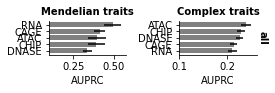

In [86]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    row="subset",
    col="dataset",
    margin_titles=True,
    sharex="col",
    sharey=False,
    height=1.4,
    aspect=1.4,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="assay",
        x="AUPRC",
        ax=ax,
        color="gray",
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    fontweight="bold",
    #size=12,
)
g.tight_layout()
#plt.savefig("../../results/plots/performance_by_assay.pdf", bbox_inches="tight")

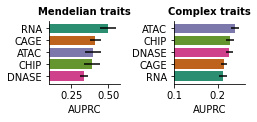

In [97]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    #row="subset",
    col="dataset",
    margin_titles=True,
    sharex="col",
    sharey=False,
    height=1.8,
    #aspect=1.4,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="assay",
        x="AUPRC",
        ax=ax,
        palette=palette,
        #color="gray",
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    fontweight="bold",
    #size=12,
)
g.tight_layout()
plt.savefig("../../results/plots/performance_by_assay_global.pdf", bbox_inches="tight")